<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Day 2)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the data set (White wine data)

The dataset contains information about several factors describing the quality of white wine. <br> Attribute information: 

**Fixed_Acidity:** The ph value for titrable acid content (0-7)

**Volatile_Acidity:** Measure of acidity due to bacteria

**Citric_Acid:** Amount of citric acid present in wine

**Residual_Sugar:** Amount of grape sugar in gms/litre

**Chlorides:** Amount of chlorides present in wine

**Free_Sulfur-dioxide:** Amount of SO2 that is not bound to other molecules

**Total_Sulfur-dioxide:** Portion of SO2 that is free in the wine plus the portion that is bound to other chemicals in the wine

**Density:** Density of wine (gms/cm<sup>3</sup>)

**pH:** The pH value of wine (0-14)

**Sulphates:** Amount of salts of sulphuric acid 

**Alcohol:** Alcohol content in percentage

**Quality:** Wine quality 

Data citation: P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

## Table of Content

1. **[Feature Transformation](#trans)**
2. **[Feature Selection](#sel)**
3. **[Model Validation](#cv)**

**Import the required libraries**

In [134]:
# type your code here
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns 
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter('ignore')
from sklearn.linear_model import LinearRegression

import statsmodels.stats.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.tsa.api as smt
from scipy import stats
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import pip as pip


from sklearn.feature_selection import RFE

from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import preprocessing


In [135]:
!pip install mlxtend
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
#from mlxtend.feature_selection import SequentialFeatureSelctor as sfs
import warnings
warnings.simplefilter('ignore')

#### Load the first dataset and check the first two observations

In [45]:
# load your data
df=pd.read_csv('whitewine.csv',sep=';')
# type your code here
df.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5,6


Loaded the first dataset and checked the first two observations

In [5]:
# check data types of variables
# type your code here
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

### Let's begin with some hands-on practice exercises

<a id="trans"> </a>
## 1. Feature Transformation

## We shall use the wine quality dataset

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Does the variable 'volatile acidity' need transformation ?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [8]:
print('The Skewness Of Volatile acidity in Wine is:',df['volatile acidity'].skew())

The Skewness Of Volatile acidity in Wine is: 1.5769795029952025


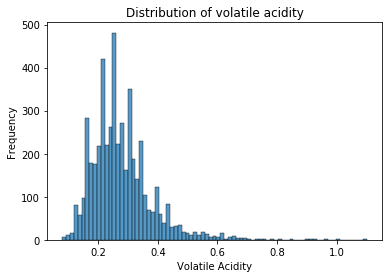

In [10]:
# type your code here
sns.histplot(df['volatile acidity'])
plt.title("Distribution of volatile acidity")
plt.xlabel('Volatile Acidity')
plt.ylabel('Frequency')
plt.show()

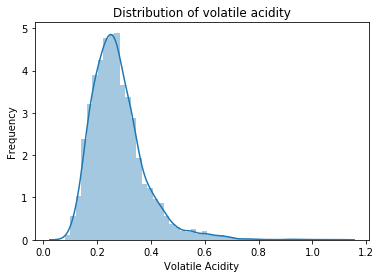

In [11]:
sns.distplot(df['volatile acidity'])
plt.title("Distribution of volatile acidity")
plt.xlabel('Volatile Acidity')
plt.ylabel('Frequency')
plt.show()

In [12]:
#shapiro wilk Test For Normality
#Ho:Skew=0:Normal
#Ha:Skew!=0:Not Normal
stats.shapiro(df["volatile acidity"])

(0.9045486450195312, 0.0)

In [ ]:
# P_Val=0 is lesser than sig_level=0.05 in the shapiro test Ho is Rejected Ha is Selected,Hence the data is not normal

variable 'volatile acidity' is Right SKewed we need to transformation

DATA IS RIGHT SKEWED HENCE IT NEED TO BE TRANSFORMED

In [4]:
np.log(df['volatile acidity'])

0      -1.309333
1      -1.203973
2      -1.272966
3      -1.469676
4      -1.469676
          ...   
4893   -1.560648
4894   -1.139434
4895   -1.427116
4896   -1.237874
4897   -1.560648
Name: volatile acidity, Length: 4898, dtype: float64

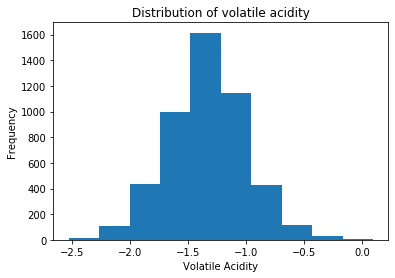

In [14]:
df['volatile acidity']=np.log(df['volatile acidity'])
plt.hist(df['volatile acidity'])
plt.title("Distribution of volatile acidity")
plt.xlabel('Volatile Acidity')
plt.ylabel('Frequency')
plt.show()

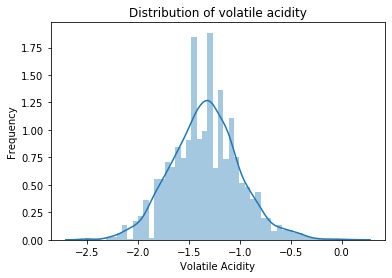

In [15]:
sns.distplot(df['volatile acidity'])
plt.title("Distribution of volatile acidity")
plt.xlabel('Volatile Acidity')
plt.ylabel('Frequency')
plt.show()

Skewness of Volatile_Acidity reduced using LOG transformation and Now It is Normally distributed

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. How can we reduce skewness of variable 'Residual_Sugar'?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

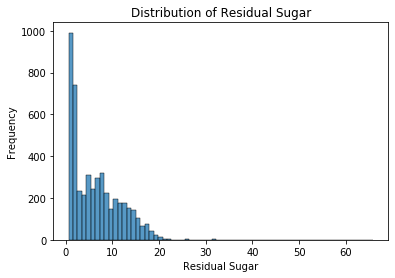

In [17]:
# type your code here
sns.histplot(df['residual sugar'])
plt.title("Distribution of Residual Sugar")
plt.xlabel('Residual Sugar')
plt.ylabel('Frequency')
plt.show()

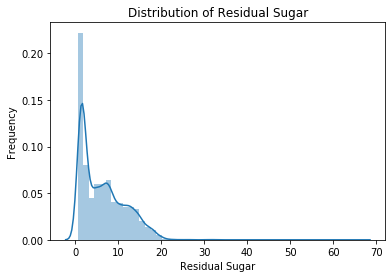

In [18]:
sns.distplot(df['residual sugar'])
plt.title("Distribution of Residual Sugar")
plt.xlabel('Residual Sugar')
plt.ylabel('Frequency')
plt.show()

In [5]:
df['residual sugar']

0       20.7
1        1.6
2        6.9
3        8.5
4        8.5
        ... 
4893     1.6
4894     8.0
4895     1.2
4896     1.1
4897     0.8
Name: residual sugar, Length: 4898, dtype: float64

##### TRANSFORMATION USING:BOX_COX

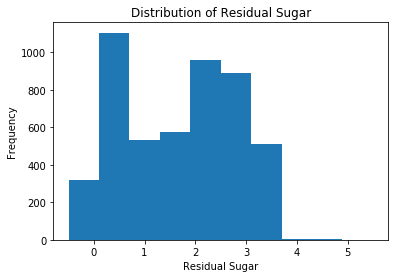

In [6]:
df['residual sugar'],lam=stats.boxcox(df['residual sugar'])
plt.hist(df['residual sugar'])
plt.title("Distribution of Residual Sugar")
plt.xlabel('Residual Sugar')
plt.ylabel('Frequency')
plt.show()

Skewness of Residual Sugar reduced using box cox transformation

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Are there features in the dataset that add little to no information ?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [7]:
# type your code here
df.var()

fixed acidity              0.712114
volatile acidity           0.010160
citric acid                0.014646
residual sugar             1.217180
chlorides                  0.000477
free sulfur dioxide      289.242720
total sulfur dioxide    1806.085491
density                    0.000009
pH                         0.022801
sulphates                  0.013025
alcohol                    1.514427
quality                    0.784356
dtype: float64

Inference:-We can see the 'Chlorides' and 'Density' have near zero variance this means they add no new information to the data,hence they can be eliminated during the feature selection

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Which transformation method is best suited to treat the skewness in variable 'alcohol'?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [10]:
df['alcohol'].skew()

0.4873419932161276

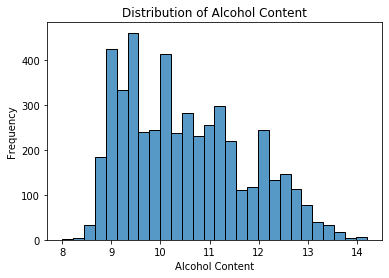

In [8]:
# type your code here
sns.histplot(df['alcohol'])
plt.title("Distribution of Alcohol Content")
plt.xlabel('Alcohol Content')
plt.ylabel('Frequency')
plt.show()

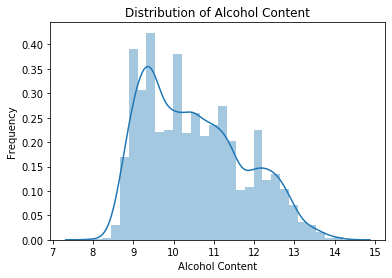

In [9]:
sns.distplot(df['alcohol'])
plt.title("Distribution of Alcohol Content")
plt.xlabel('Alcohol Content')
plt.ylabel('Frequency')
plt.show()

In [ ]:
ALCOHOL VARIABLE IN DATA IS RIGHT SKEWED

###### USING Log transformation

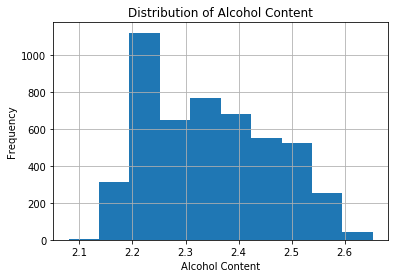

In [12]:
new_alcohol = np.log(df.alcohol)
new_alcohol.hist()
plt.title("Distribution of Alcohol Content")
plt.xlabel('Alcohol Content')
plt.ylabel('Frequency')
plt.show()

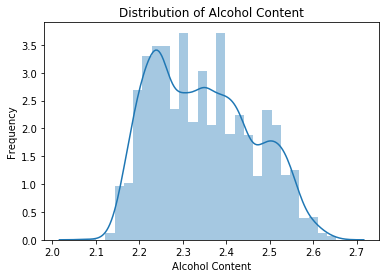

In [13]:
sns.distplot(new_alcohol)
plt.title("Distribution of Alcohol Content")
plt.xlabel('Alcohol Content')
plt.ylabel('Frequency')
plt.show()

In [ ]:
VARIABLE REMAIN SAME,HENCE WE USE OTHER TRANSFORM

###### USING Reciprocal transformation:-

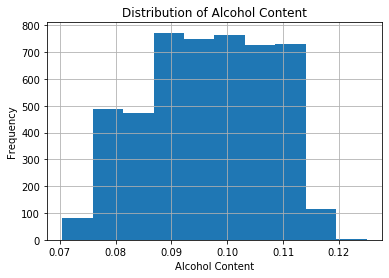

In [15]:
wine_alcohol = np.reciprocal(df.alcohol)
wine_alcohol.hist()
plt.title("Distribution of Alcohol Content")
plt.xlabel('Alcohol Content')
plt.ylabel('Frequency')
plt.show()

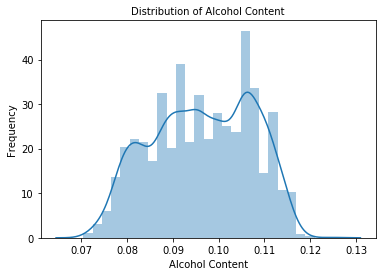

In [16]:
sns.distplot(wine_alcohol)
plt.title("Distribution of Alcohol Content", fontsize = 10)
plt.xlabel('Alcohol Content', fontsize = 10)
plt.ylabel('Frequency', fontsize = 10)
plt.show()

Hence reciprocal transformation is most suitable to treat skewness of variable alcohol in wine Dataset

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Does scaling the feature 'pH' lead to better prediction when considering a full model ?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

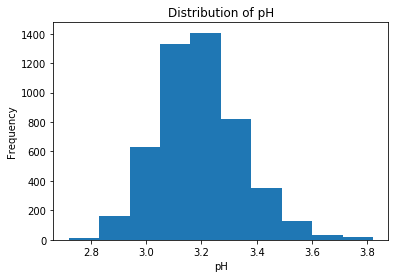

In [17]:
# type your code here
plt.hist(df['pH'])
plt.title("Distribution of pH")
plt.xlabel('pH')
plt.ylabel('Frequency')
plt.show()

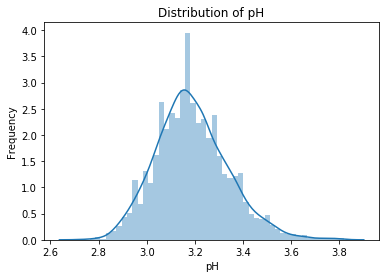

In [18]:
sns.distplot(df['pH'])
plt.title("Distribution of pH")
plt.xlabel('pH')
plt.ylabel('Frequency')
plt.show()

In [19]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,3.680927,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,0.484028,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,2.183566,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,2.452280,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,2.452280,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [23]:
import statsmodels.api as sm
x=df
X=sm.add_constant(x)
y=df['quality']
ols_model =sm.OLS(y,X).fit()
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.990e+27
Date:                Thu, 28 Oct 2021   Prob (F-statistic):               0.00
Time:                        18:27:26   Log-Likelihood:             1.3682e+05
No. Observations:                4898   AIC:                        -2.736e+05
Df Residuals:                    4885   BIC:                        -2.735e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1.137e-13 

FSTATS=0<0.05 HENCE MODEL IS SIGNIFICANCE AND BUT R_SQUARE=1 HENCE VARIABLE IS NOT SIGNIFICANT FOR MODEL PREDICTION BECAUSE MODEL IS OVERFIT.HENCE WE CAN REMOVE THE VARIABLE OR TRANSFORM THE VARIABLE AND IF R_SQUARED BECOMES <1 WE CAN USE THIS MODEL

since the variable PH in Wine is not highly skewed we can use standardization for the scaling of the pH
varaible

In [25]:
# creating StandardScaler
scaler = preprocessing.StandardScaler()
df.pH = scaler.fit_transform(pd.DataFrame(df.pH))

In [26]:
X = df.iloc[:,:10]
X = sm.add_constant(X)
y = df['quality']
olsMLR_model = sm.OLS(y,X).fit()
print(olsMLR_model.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.245
Model:                            OLS   Adj. R-squared:                  0.243
Method:                 Least Squares   F-statistic:                     158.3
Date:                Thu, 28 Oct 2021   Prob (F-statistic):          8.57e-289
Time:                        18:32:24   Log-Likelihood:                -5667.4
No. Observations:                4898   AIC:                         1.136e+04
Df Residuals:                    4887   BIC:                         1.143e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  208.7666 

FSTATS=0<0.05 HENCE MODEL IS SIGNIFICANCE AND R_SQUARE=0.245 AND ADJUSTED R_SQUARE=0.24.HENCE VARIABLE IS SIGNIFICANT FOR MODEL PREDICTION
As we can see the scaling pH feature have impact on prediction performance since R-square value(FROM OVERFIT)TO FIT is Visualized from Model Summary

###### INFEENCE:-We can infer that scaling of pH variable improve the model even if the range of features are different

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. What could be done to resolve the issue of multicollinearity if present?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [32]:
def vif_scores(df):
    VIF_Scores = pd.DataFrame()
    VIF_Scores["Independent Features"] = df.columns
    VIF_Scores["VIF Scores"] = [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    return VIF_Scores
df1 = df.iloc[:,:-1]
vif_scores(df1)

,Independent Features,VIF Scores
0,fixed acidity,91.850725
1,volatile acidity,9.752588
2,citric acid,9.983358
3,residual sugar,4.754184
4,chlorides,6.482653
5,free sulfur dioxide,9.269810
6,total sulfur dioxide,25.313742
7,density,283.330097
8,pH,1.332942
9,sulphates,20.574342


From the result we can see multicolinearity and to determine the variable that contribute to multicollinearity we use VIF threshold value = 10 Hence to rectify this we need to eliminate Fixed acidity, volatile acidity, total sulfur dioxide, density, sulphates and alcohol

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7.  Fit a full model. Is the assumption for normality of residuals violated ?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [35]:
# type your code here
x=df.iloc[:,:10]
X=sm.add_constant(X)
y=df['quality']
ols_model=sm.OLS(y,X).fit()
residuals=ols_model.resid
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.245
Model:                            OLS   Adj. R-squared:                  0.243
Method:                 Least Squares   F-statistic:                     158.3
Date:                Thu, 28 Oct 2021   Prob (F-statistic):          8.57e-289
Time:                        18:52:08   Log-Likelihood:                -5667.4
No. Observations:                4898   AIC:                         1.136e+04
Df Residuals:                    4887   BIC:                         1.143e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  208.7666 

FSTATS=0<0.05 HENCE MODEL IS SIGNIFICANCE AND R_SQUARE=0.245 AND ADJUSTED R_SQUARE=0.243.HENCE VARIABLE IS SIGNIFICANT FOR MODEL PREDICTION

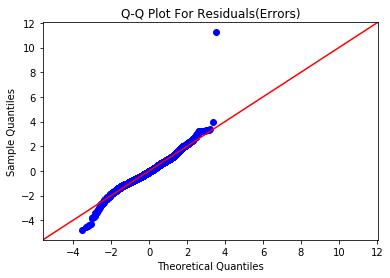

In [37]:
sm.qqplot(ols_model.resid,fit=True,line='45')
plt.title('Q-Q Plot For Residuals(Errors)')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

residuals follow normal distribution

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Does the transformation of variable 'citric acid' affect the performance of prediction model?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

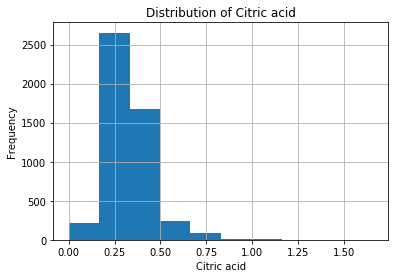

In [46]:
df['citric acid'].hist()
plt.title("Distribution of Citric acid")
plt.xlabel('Citric acid')
plt.ylabel('Frequency')
plt.show()

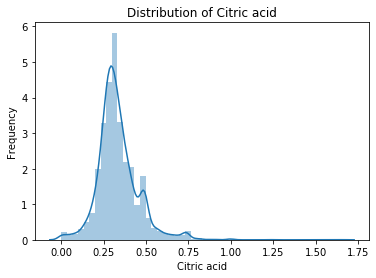

In [47]:
sns.distplot(df['citric acid'])
plt.title("Distribution of Citric acid")
plt.xlabel('Citric acid')
plt.ylabel('Frequency')
plt.show()

In [48]:
x=df.iloc[:,:10]
X=sm.add_constant(X)
y=df['quality']
olsmodel=sm.OLS(y,X).fit()
print(olsmodel.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.245
Model:                            OLS   Adj. R-squared:                  0.243
Method:                 Least Squares   F-statistic:                     158.3
Date:                Thu, 28 Oct 2021   Prob (F-statistic):          8.57e-289
Time:                        18:55:32   Log-Likelihood:                -5667.4
No. Observations:                4898   AIC:                         1.136e+04
Df Residuals:                    4887   BIC:                         1.143e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  208.7666 

TRANSFORMATION

In [49]:
# type your code here
df['citric acid']=np.sqrt(df['citric acid'])
df['citric acid']

0       0.600000
1       0.583095
2       0.632456
3       0.565685
4       0.565685
          ...   
4893    0.538516
4894    0.600000
4895    0.435890
4896    0.547723
4897    0.616441
Name: citric acid, Length: 4898, dtype: float64

In [50]:
x=df.iloc[:,:10]
X=sm.add_constant(X)
y=df['quality']
olsmodel=sm.OLS(y,X).fit()
print(olsmodel.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.245
Model:                            OLS   Adj. R-squared:                  0.243
Method:                 Least Squares   F-statistic:                     158.3
Date:                Thu, 28 Oct 2021   Prob (F-statistic):          8.57e-289
Time:                        18:56:09   Log-Likelihood:                -5667.4
No. Observations:                4898   AIC:                         1.136e+04
Df Residuals:                    4887   BIC:                         1.143e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  208.7666 

Square root transformation takes no zero values. After transformation we can see R-square value has slightly increased,hence this transformation leads to slight improvement in model performance

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Fit a full model. Check whether variable has linear relationship with the wine quality<br></b>
                </font>
            </div>
        </td>
    </tr>
</table>

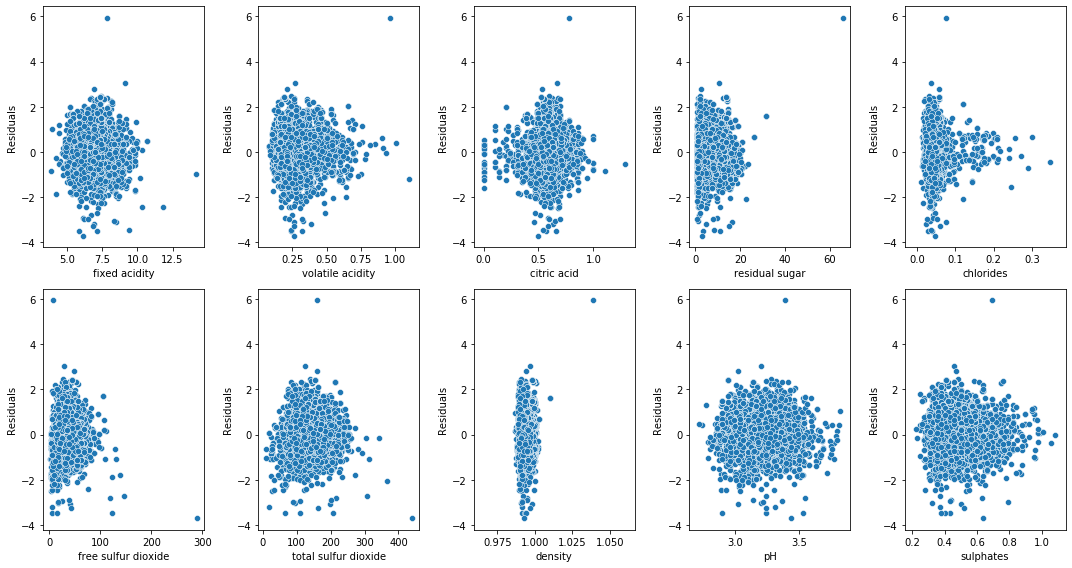

In [51]:
# type your code here
X = df.iloc[:,:10]
X = sm.add_constant(X)
y = df['quality']
MLR_model = sm.OLS(y,X).fit()
residuals = MLR_model.resid
fig, ax = plt.subplots(nrows = 2, ncols= 5, figsize=(15,8))
# use for loop to create scatter plot
# 'ax' assigns axes object to draw the plot
for variable, subplot in zip(X.columns[1:],ax.flatten()):
 z = sns.scatterplot(X[variable], residuals , ax = subplot)
 z.set_ylabel("Residuals", fontsize = 10)
plt.tight_layout()
plt.show()



No pattern observed in plots for variables, fixed acidity, volatile acidity, citric acid, residual sugar, total sulfardioxide, density and pH vary linearly with target variable

<a id="sel"> </a>
## 2. Feature Selection

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Find the top five significant variables from the dataset using forward selection technique. Also display the R-squared score for the model built using these five variables.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [55]:
# type your code here
from sklearn.model_selection import train_test_split
X =df.drop('quality',axis = 1)
y =df['quality']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state=1)
linreg = LinearRegression()

In [56]:
linreg_forward = SFS(estimator = linreg, k_features = 5, forward = True, verbose=2,cv=5)
SFS_forward=linreg_forward.fit(X_train, y_train)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.0s finished

[2021-10-28 19:00:22] Features: 1/5 -- score: 0.18505694336863085[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished

[2021-10-28 19:00:22] Features: 2/5 -- score: 0.23781148780314462[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished

[2021-10-28 19:00:22] Features: 3/5 -- score: 0.2558191581149891[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   

In [63]:
print('Features selected using forward selection are: \n', SFS_forward.k_feature_names_)
print('\nR-squared: ', SFS_forward.k_score_)


Features selected using forward selection are: 
 ('fixed acidity', 'volatile acidity', 'residual sugar', 'free sulfur dioxide', 'alcohol')

R-squared:  0.2641784456322673


So, most important features according to the forward selection method is 'fixed acidity', 'volatile acidity', 'residual sugar', 'free sulfur dioxide', 'alcohol'

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>11. Find the top five significant variables from the dataset using backward elimination technique. Also display the R-squared score for the model built using these five variables.<br><br> Compare the R-squared value obtained from question 10 with the value obtained using backward elimination.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [64]:
# type your code here
linreg = LinearRegression()
linreg_backward = SFS(estimator = linreg, k_features = 5, forward = False, verbose=2,cv=5)
SFS_backward = linreg_backward.fit(X_train, y_train)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.0s finished

[2021-10-28 19:05:21] Features: 10/5 -- score: 0.27190086033847666[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished

[2021-10-28 19:05:21] Features: 9/5 -- score: 0.27237530496379464[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished

[2021-10-28 19:05:21] Features: 8/5 -- score: 0.2727691661986732[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

In [80]:
print('Features selected using backward elimination are: \n', SFS_backward.k_feature_names_)
print('\nR-squared: ', SFS_backward.k_score_)

Features selected using backward elimination are: 
 ('volatile acidity', 'residual sugar', 'density', 'pH', 'alcohol')

R-squared:  0.26707921332711404


So, most important features according to the Backward Elimination method is 'volatile acidity', 'residual sugar', 'density', 'pH', 'alcohol'

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Find the best set of significant variables from the dataset using forward selection technique such that the selected set should have 2 to 6 features. Also display the R-squared score for the model built using the selected variables</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [83]:
# type your code here
linreg = LinearRegression()
linreg_forward = SFS(estimator = linreg, k_features = (2,6), forward = True, verbose=2,cv=5)
SFS_forward = linreg_forward.fit(X_train, y_train)
print('Features selected using forward selection are: \n', SFS_forward.k_feature_names_)
print('\nR-squared: ', SFS_forward.k_score_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.0s finished

[2021-10-28 19:23:09] Features: 1/6 -- score: 0.18505694336863085[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished

[2021-10-28 19:23:10] Features: 2/6 -- score: 0.23781148780314462[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished

[2021-10-28 19:23:10] Features: 3/6 -- score: 0.2558191581149891[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   

Features selected using forward selection are: 
 ('fixed acidity', 'volatile acidity', 'residual sugar', 'free sulfur dioxide', 'sulphates', 'alcohol')

R-squared:  0.2662686963487884


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished

[2021-10-28 19:23:10] Features: 5/6 -- score: 0.2641784456322673[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s finished

[2021-10-28 19:23:10] Features: 6/6 -- score: 0.2662686963487884

Features selected using forward selection are 'fixed acidity', 'volatile acidity', 'residual sugar', 'free sulfur dioxide', 'sulphates', 'alcohol'

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Find the best set of significant variables from the dataset using forward selection technique. Also display the R-squared score for the model built using the selected variables.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [84]:
# type your code here
linreg = LinearRegression()
linreg_forward = SFS(estimator = linreg, k_features = 'best' , forward = True, verbose=2,cv=5)
SFS_forward = linreg_forward.fit(X_train, y_train)
print('Features selected using forward selection are: \n', SFS_forward.k_feature_names_)
print('\nR-squared: ', SFS_forward.k_score_)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.0s finished

[2021-10-28 19:24:01] Features: 1/11 -- score: 0.18505694336863085[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished

[2021-10-28 19:24:01] Features: 2/11 -- score: 0.23781148780314462[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished

[2021-10-28 19:24:02] Features: 3/11 -- score: 0.2558191581149891[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done

Features selected using forward selection are: 
 ('fixed acidity', 'volatile acidity', 'residual sugar', 'free sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol')

R-squared:  0.2697928636160954



[2021-10-28 19:24:02] Features: 9/11 -- score: 0.2697468716008566[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished

[2021-10-28 19:24:02] Features: 10/11 -- score: 0.2692814106662882[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished

[2021-10-28 19:24:02] Features: 11/11 -- score: 0.2684418321121529

Features selected using forward selection are:'fixed acidity', 'volatile acidity', 'residual sugar', 'free sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Find the best set of significant variables from the dataset using backward elimination technique. Also display the R-squared score for the model built using the selected variables. <br><br>Compare the R-squared value obtained from question 13 with the value obtained using backward elimination.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [86]:
# type your code here
linreg = LinearRegression()
linreg_backward = SFS(estimator = linreg, k_features = 'best', forward = False, verbose=2,cv=5)
SFS_backward = linreg_backward.fit(X_train, y_train)
print('Features selected using backward elimination are: \n', SFS_backward.k_feature_names_)
print('\nR-squared: ', SFS_backward.k_score_)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.0s finished

[2021-10-28 19:25:26] Features: 10/1 -- score: 0.27190086033847666[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished

[2021-10-28 19:25:26] Features: 9/1 -- score: 0.27237530496379464[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished

[2021-10-28 19:25:26] Features: 8/1 -- score: 0.2727691661986732[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

Features selected using backward elimination are: 
 ('volatile acidity', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol')

R-squared:  0.2727691661986732


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished

[2021-10-28 19:25:26] Features: 1/1 -- score: 0.18505694336863085

Features selected using backward elimination are:'volatile acidity', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Find the best set of significant variables from the dataset among all the possible subsets of the variables. Build a linear regression model using the best subset and find the R-Squared value for that model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [88]:
# type your code here
linreg_rfe = LinearRegression()
rfe_model = RFE(estimator=linreg_rfe, n_features_to_select = 5)
rfe_model = rfe_model.fit(X_train,y_train)
feat_index = pd.Series(data = rfe_model.ranking_, index = X_train.columns)
signi_feat_rfe = feat_index[feat_index==1].index
print(signi_feat_rfe)

Index(['volatile acidity', 'chlorides', 'density', 'sulphates', 'alcohol'], dtype='object')


Creating linear regression model using significant variable obtained after RFE

In [90]:
new_X_train = X_train[signi_feat_rfe]
linreg = LinearRegression()
linreg.fit(new_X_train,y_train)
r2_value_rfe = linreg.score(new_X_train,y_train)
print('The r-squared value for the model built using the variables obtained using RFE is:',r2_value_rfe)


The r-squared value for the model built using the variables obtained using RFE is: 0.2489256449884476


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. Calculate the RMSE for the train set and test set for the model created using the top 5 variables obtained from forward selection in question 10. Check if the model is overfitted on the train set or not. If yes, then why do you think so?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [91]:
# type your code here
SFS_features = SFS_forward.k_feature_names_
new_X_train = X_train.loc[:,SFS_features]
new_X_test = X_test.loc[:,SFS_features]
linreg = LinearRegression()
linreg.fit(new_X_train,y_train)


LinearRegression()

In [92]:
train_pred = linreg.predict(new_X_train)
test_pred = linreg.predict(new_X_test)
mse_train = mean_squared_error(y_train, train_pred)
rmse_train = round(np.sqrt(mse_train), 4)
print("Root Mean Squared Error (RMSE) on training test set: ", rmse_train)
mse_test = mean_squared_error(y_test, test_pred)
rmse_test = round(np.sqrt(mse_test), 4)
print("Root Mean Squared Error (RMSE) on test set: ", rmse_test)

Root Mean Squared Error (RMSE) on training test set:  0.7542
Root Mean Squared Error (RMSE) on test set:  0.7361


From RMSE values for the train and test set errors are nearly same this shows that model is not overfitted on the training data


<a id="cv"> </a>
## 3. Model Validation

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. Create a new feature based on the 'pH' which tells whether wine is acidic, basic or neutral. Will this variable significantly contribute to the model?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [95]:
# type your code here
ph_verbose = []
for i in range(0,df.pH.shape[0]):
    if df.pH.iloc[i]==7:
        ph_verbose.append('Neutral')
    elif df.pH.iloc[i]>7:
         ph_verbose.append('Basic')
    elif df.pH.iloc[i]<7:
         ph_verbose.append('Acidic')
df['pH_verbose'] = ph_verbose


In [96]:
df['pH_verbose'].value_counts()

Acidic    4898
Name: pH_verbose, dtype: int64

Only one value in the feature. Thus it cant be removed

In [97]:
df.drop("pH_verbose", axis = 1, inplace = True)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Fit the a full model. Validate the model using cross validation method</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [99]:
# type your code here
def get_score(model, X_train_k, X_test_k, y_train_k, y_test_k):
    model.fit(X_train_k, y_train_k)
    return model.score(X_test_k, y_test_k)

In [100]:
df_copy = df.copy()
X = df_copy.drop('quality', axis = 1)
y = df_copy['quality']


In [101]:
scores = cross_val_score( estimator = LinearRegression(),
 X = X_train,
 y = y_train,
 cv = 2,
 scoring = 'r2',
 )

In [102]:
print("All Scores: ", scores)
print("\nMinimum Scores obtained: ", round(min(scores), 4))
print("Maximum Scores obtained: ", round(max(scores), 4))
print("Average Scores obtained: ", round(np.mean(scores), 4))


All Scores:  [0.2679219  0.27791492]

Minimum Scores obtained:  0.2679
Maximum Scores obtained:  0.2779
Average Scores obtained:  0.2729


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Fit the a full model. Validate the model using 5 - fold cross validation</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [116]:
# type your code here
kf = KFold(n_splits = 5)

In [133]:
scores = []
for train_index, test_index in kf.split(X_train):
    X_train_k, X_test_k, y_train_k, y_test_k = X_train.iloc[train_index], X_train,y_train.iloc[train_index],y_train
    scores.append(get_score(LinearRegression(), X_train_k, X_test_k, y_train_k,y_test_k))
print("All Scores:", scores)
print("\nMinimum Scores obtained: ",round(min(scores), 4))
print("Maximum Scores obtained: ", round(max(scores), 4))
print("Average Scores obtained: ", round(np.mean(scores), 4)) 

All Scores: [0.28263673838113357, 0.28062248379001886, 0.28287686308466, 0.2826417736445457, 0.28252920521653335]

Minimum Scores obtained:  0.2806
Maximum Scores obtained:  0.2829
Average Scores obtained:  0.2823


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Fit the a full model. Validate the model using leave one out cross validation</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [108]:
# type your code here
df_copy = df.copy()
X = df_copy.drop('quality', axis = 1)
y = df_copy['quality']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state=1)

In [109]:
loocv_rmse = []
loocv = LeaveOneOut()
for train_index, test_index in loocv.split(X_train):
     X_train_l, X_test_l, y_train_l, y_test_l = X_train.iloc[train_index], X_train,y_train.iloc[train_index], y_train
     linreg = LinearRegression()
     linreg.fit(X_train_l, y_train_l)
 
     mse = mean_squared_error(y_test_l, linreg.predict(X_test_l))
     rmse = np.sqrt(mse)
 
     loocv_rmse.append(rmse)

In [110]:
loocv_rmse

[0.7578627403976947,
 0.7578635684802707,
 0.7578625552176671,
 0.7578627143672425,
 0.7578625917095577,
 0.7578627119788781,
 0.7578625651243136,
 0.75786261046553,
 0.7578645303191366,
 0.757862644726687,
 0.7578626142266933,
 0.7578632497241837,
 0.757862554952921,
 0.7578628770718543,
 0.7578629791962569,
 0.7578626170925686,
 0.7578625727418723,
 0.7578625849361051,
 0.7578651916195909,
 0.7578628149133849,
 0.7578626475957656,
 0.7578627798923662,
 0.7578626574709587,
 0.7578626057435266,
 0.7578627399796681,
 0.7578644269430272,
 0.7578625563023005,
 0.7578626700429862,
 0.7578625553591857,
 0.7578629272817076,
 0.7578626432225029,
 0.7578631829265292,
 0.7578628895715119,
 0.7578625559691606,
 0.7578629570747667,
 0.757862563521589,
 0.7578627435935884,
 0.7578626475277083,
 0.7578628591342214,
 0.7578638576162796,
 0.7578625610487205,
 0.7578626982379272,
 0.7578630906187754,
 0.7578636884210809,
 0.7578625671288199,
 0.7578626353438699,
 0.7578625697141426,
 0.757862622751980

In [111]:
print("\nMinimum RMSE obtained: ", round(min(loocv_rmse), 4))
print("Maximum RMSE obtained: ", round(max(loocv_rmse), 4))
print("Average RMSE obtained: ", round(np.mean(loocv_rmse), 4))


Minimum RMSE obtained:  0.7579
Maximum RMSE obtained:  0.7596
Average RMSE obtained:  0.7579


RMSE are Same,Hence We Validated the model using leave one out cross validation